In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

#Loading the dataset

In [48]:
df1=pd.read_csv("/content/diabetes_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
df_copy = df.copy()

In [50]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [51]:
duplicates = df_copy[df_copy.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [52]:
import seaborn as sns
correlation_matrix = df_copy.corr(numeric_only=True)
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

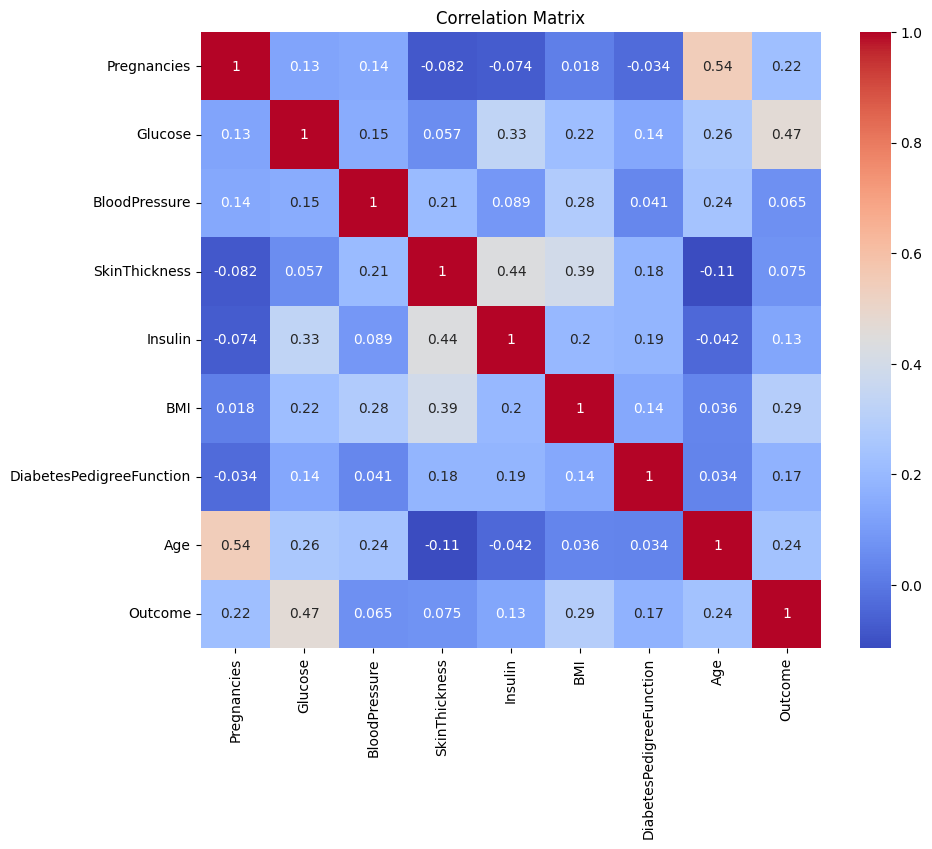

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

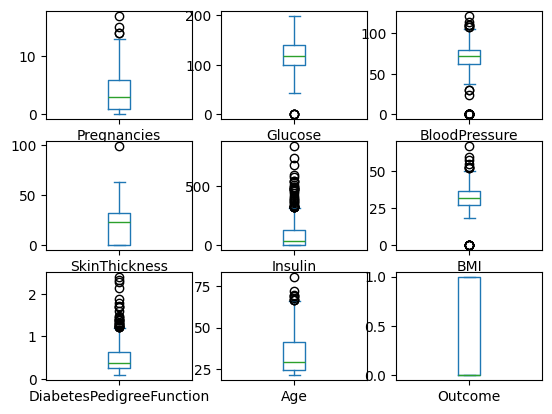

In [54]:
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False)
plt.show()

#Finding the outliars

In [59]:
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit= q3 + 1.5 * iqr
    lower_limit= q1 - 1.5 * iqr
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    print(upper_limit)
    print(lower_limit)
    return df

for col in column:
  df = remove_outliers(df,col)

13.5
-6.5
201.5
37.5
107.0
35.0
82.5
-49.5
330.0
-198.0
49.60000000000001
13.799999999999997
1.17375
-0.31225
65.25
-0.75


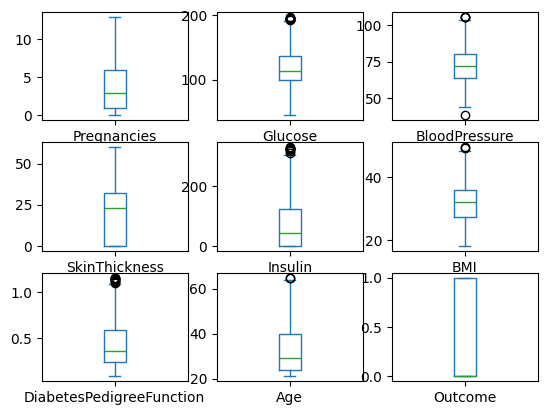

In [60]:
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False)
plt.show()

<Axes: ylabel='Pregnancies'>

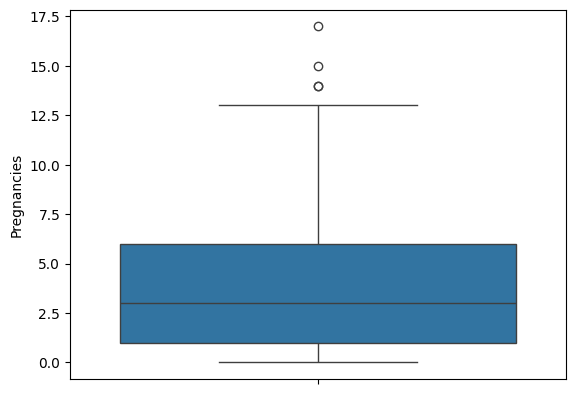

In [56]:
sns.boxplot(df_copy["Pregnancies"])

<Axes: ylabel='Glucose'>

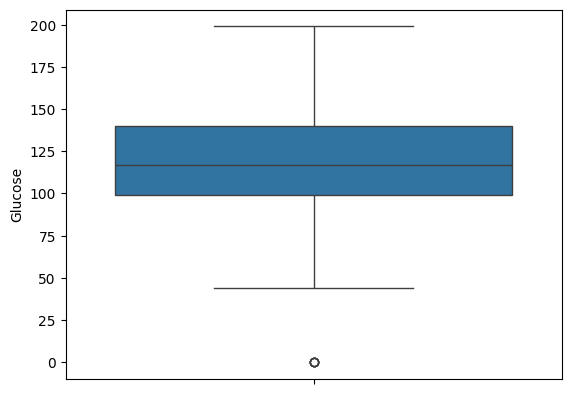

In [13]:
sns.boxplot(df_copy["Glucose"])

<Axes: ylabel='BloodPressure'>

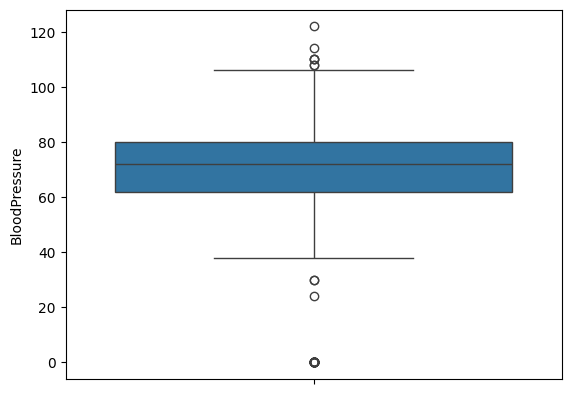

In [15]:
sns.boxplot(df_copy["BloodPressure"])

<Axes: ylabel='SkinThickness'>

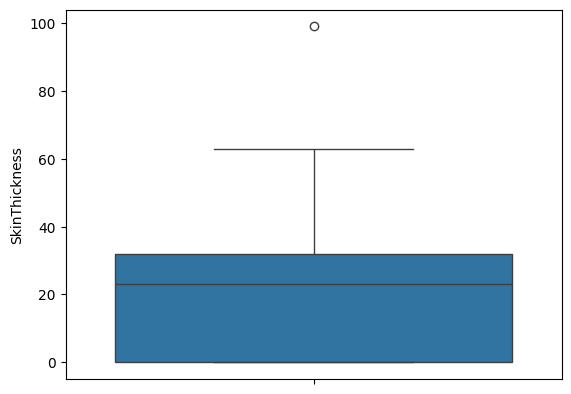

In [16]:
sns.boxplot(df_copy["SkinThickness"])

<Axes: ylabel='Insulin'>

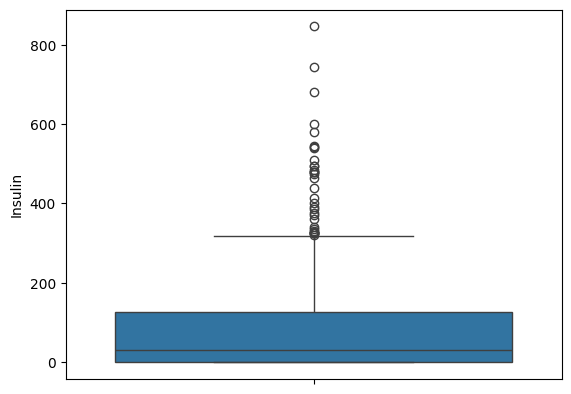

In [46]:
sns.boxplot(df_copy["Insulin"])

In [62]:
X=df_copy.drop("Outcome",axis=1)
y=df_copy["Outcome"]

#splitting data

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#defining and trainng the model

In [64]:
model = LogisticRegression(max_iter=(1000))
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [68]:
y_pred=model.predict(X_test)
print(y_test)
print(y_pred)

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [71]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.7467532467532467
